PCA 降維原理
PCA （Principal Component Analysis）主成分分析是線性的數據降維技術，採用一種數學降維的方法，在損失很少信息的前提下，找出幾個綜合變量作為主成分，來代替原來眾多的變量。每個主成分都是原始變量的線性組合，各個主成分之間不相關

Sklearn中使用PCA
在sklearn中要使用PCA要使用sklearn.decomposition.PCA

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [2]:
wine_x, wine_y = datasets.load_wine(return_X_y=True)
wine_x = StandardScaler().fit_transform(wine_x)

In [5]:
wine_x.shape

(178, 13)

In [4]:
wine_y.shape

(178,)

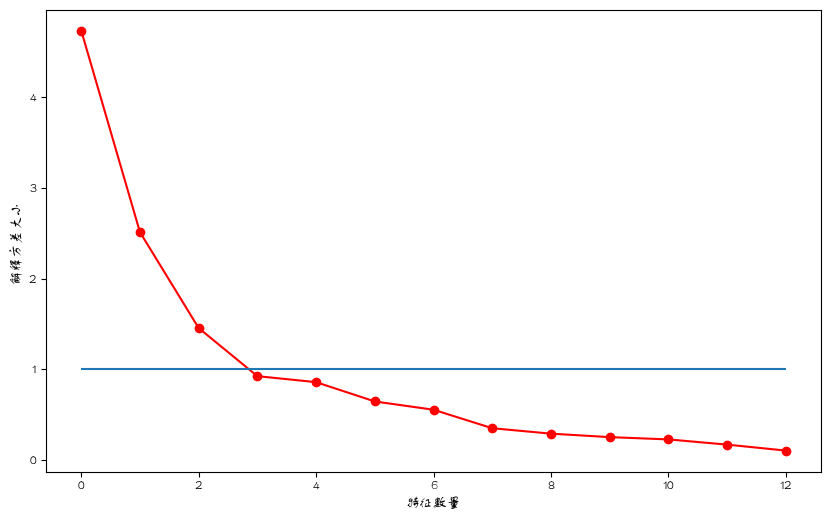

In [8]:
# PCA降維並數據可視化

import matplotlib.pyplot as plt

plt.rcParams["font.family"] = ["FZShuTi"]

pca = PCA(n_components=13,random_state=123)
pca.fit(wine_x)

#可視化PCA的解釋方差得分
exvar = pca.explained_variance_ # 獲取PCA的解釋方差得分，分數越高越重要
plt.figure(figsize=(10,6))
plt.plot(exvar,"r-o")
plt.hlines(y=1,xmin=0,xmax=12) # 可以從這條橫線看出，前三個特征可以解釋大部分的情況
plt.xlabel("特征數量")
plt.ylabel("解釋方差大小")
plt.show()

- 可以發現，使用數據的前3個組成部分較為合適

In [10]:
pca_wine_x = pca.transform(wine_x)[:,:3]
pca_wine_x.shape

(178, 3)

C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


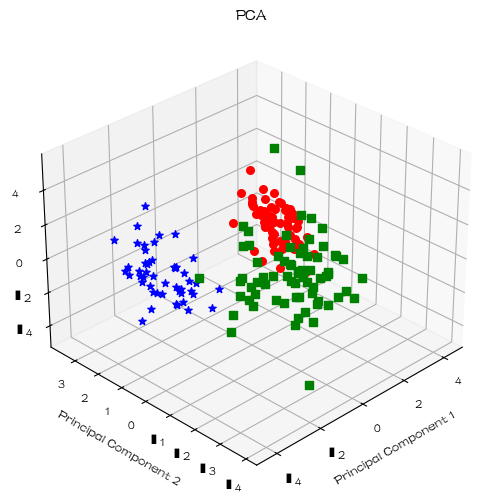

In [13]:
colors = ["red","green","blue"]
shapes = ['o','s','*']
fig = plt.figure(figsize=(10,6))

# 將坐標系設置為三維
ax1 = fig.add_subplot(111,projection="3d")
for ii,y in enumerate(wine_y):
    ax1.scatter(pca_wine_x[ii,0], pca_wine_x[ii,1], pca_wine_x[ii,2],
                s=30, c=colors[y],marker=shapes[y])
ax1.set_xlabel("Principal Component 1",rotation=20)
ax1.set_ylabel("Principal Component 2",rotation=-20)
ax1.set_zlabel("Principal Component 3",rotation=90)
ax1.azim = 225
ax1.set_title("PCA")
plt.show()